# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#File paths

In [ ]:
save_path = "/content/drive/MyDrive/CNXSIA001_LAIDS_SOURCE_CODE/PCA-CNN Model Files/Models" # Model path
dataset_path =  "/content/drive/MyDrive/CNXSIA001_LAIDS_SOURCE_CODE/PCA-CNN Model Files/Datasets"

# Load in Preprocessed CICIDS2017 Dataset

In [ ]:
import pandas as pd
import os

# Load baseline training set
adasyn_baseline_X_train = pd.read_csv(os.path.join(dataset_path, "adasyn_baseline_X_train.csv"))
y_train = pd.read_csv(os.path.join(dataset_path, "adasyn_baseline_y_train.csv"))

# Load baseline validation set
baseline_X_val = pd.read_csv(os.path.join(dataset_path, "baseline_X_val.csv"))
y_val = pd.read_csv(os.path.join(dataset_path, "baseline_y_val.csv"))

# Load baseline test set
baseline_X_test = pd.read_csv(os.path.join(dataset_path, "baseline_X_test.csv"))
y_test = pd.read_csv(os.path.join(dataset_path, "baseline_y_test.csv"))

#Encoding map
attack_type_map = {'Normal Traffic': 0, 'Port Scanning': 1, 'Web Attacks': 2, 'Brute Force': 3, 'DDoS': 4, 'Bots': 5, 'DoS': 6} # Create a mapping from attack type to integer label


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Apply PCA
Principal component analysis (PCA) is a dimensionality reduction and unsuprevised machine learning method used to simplify a large data set into a smaller set while still maintaining
significant patterns and trends.
Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated. Most of the information within the initial variables is squeezed or compressed into the first

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA # Import PCA

# Retain 100% of the variance
pca = PCA(n_components=21)

# Only fit the PCA to the training data
pcaX_train = pca.fit_transform(adasyn_baseline_X_train) # To avoid data leakage (information from the test set influences the model during training)
pcaX_val = pca.transform(baseline_X_val) # Apply the PCA to the validation data
pcaX_test = pca.transform(baseline_X_test) # Apply the PCA to the test data

print(f"Number of principle components: {pca.n_components_}")


Number of principle components: 21


Visualise variance distribution

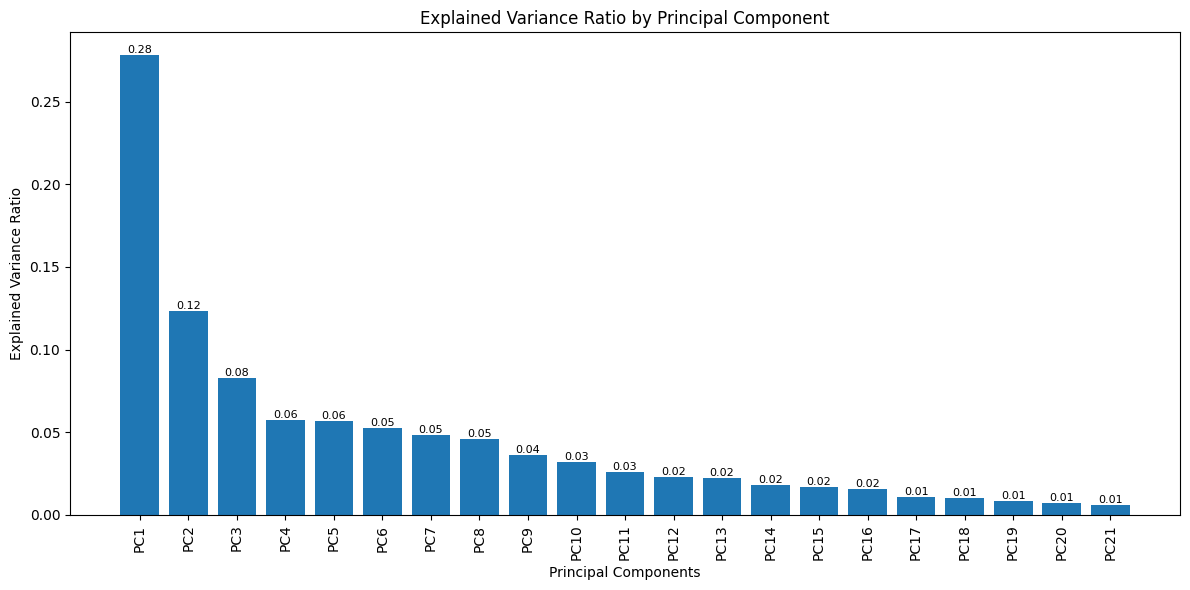

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA # Import PCA

explained_variance_ratio = pca.explained_variance_ratio_ # Get explained variance ratio from the PCA object

# Create labels for the x-axis (PC1, PC2, ...)
pc_labels = [f'PC{i+1}' for i in range(len(explained_variance_ratio))]

# Create the plot
plt.figure(figsize=(12, 6))
bars = plt.bar(pc_labels, explained_variance_ratio)

# Add values above each bar
for bar, val in zip(bars, explained_variance_ratio):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x position (center of bar)
        bar.get_height(),                   # y position (top of bar)
        f"{val:.2f}",                       # format value (2 decimal places)
        ha='center', va='bottom', fontsize=8
    )

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.xticks(rotation=90) # Rotate labels for better readability
plt.tight_layout()
plt.show()


#Save the PCA-CNN Datasets for later use

In [ ]:
# Training set
pd.DataFrame(pcaX_train).to_csv(os.path.join(dataset_path, "adasyn_pca_cnn_X_train.csv"), index=False)
pd.DataFrame(y_train).to_csv(os.path.join(dataset_path, "adasyn_pca_cnn_y_train.csv"), index=False)

# Validation set
pd.DataFrame(pcaX_val).to_csv(os.path.join(dataset_path, "pca_cnn_X_val.csv"), index=False)
pd.DataFrame(y_val).to_csv(os.path.join(dataset_path, "pca_cnn_y_val.csv"), index=False)

# Test set
pd.DataFrame(pcaX_test).to_csv(os.path.join(dataset_path, "pca_cnn_X_test.csv"), index=False)
pd.DataFrame(y_test).to_csv(os.path.join(dataset_path, "pca_cnn_y_test.csv"), index=False)

print("Datasets saved successfully!")

Datasets saved successfully!


# Load in saved pca-cnn datasets and reshape for cnn input

In [ ]:
import pandas as pd
import os
import numpy as np


#Encoding map
attack_type_map = {'Normal Traffic': 0, 'Port Scanning': 1, 'Web Attacks': 2, 'Brute Force': 3, 'DDoS': 4, 'Bots': 5, 'DoS': 6} # Create a mapping from attack type to integer label

# Training sets
X_train = pd.read_csv(os.path.join(dataset_path, "adasyn_pca_cnn_X_train.csv")).to_numpy()
y_train = pd.read_csv(os.path.join(dataset_path, "adasyn_pca_cnn_y_train.csv")).to_numpy().ravel()

# Validation sets
X_val = pd.read_csv(os.path.join(dataset_path, "pca_cnn_X_val.csv")).to_numpy()
y_val = pd.read_csv(os.path.join(dataset_path, "pca_cnn_y_val.csv")).to_numpy().ravel()

# Test sets
X_test = pd.read_csv(os.path.join(dataset_path, "pca_cnn_X_test.csv")).to_numpy()
y_test = pd.read_csv(os.path.join(dataset_path, "pca_cnn_y_test.csv")).to_numpy().ravel()

# Reshape the data so it can be used as input for the 1D CNN. The 1D CNN expects input shape: (samples, number of features, channels)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val   = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# --- Check dataset shapes ---
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val:",   X_val.shape,   "y_val:",   y_val.shape)
print("X_test:",  X_test.shape,  "y_test:",  y_test.shape)

def print_class_distribution(label, name=""):
    classes, counts = np.unique(label, return_counts=True)
    print(f"\n{name} set class distribution:")
    for c, num in zip(classes, counts):
        print(f"  Class {c}: {num}")
    print(f"  Total: {len(label)}")

# Print distributions
print_class_distribution(y_train, "Training")
print_class_distribution(y_val, "Validation")
print_class_distribution(y_test, "Test")



#1D CNN model

Baseline CNN code

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, Input,GlobalAveragePooling1D

# Define input shape
input_shape = (X_train.shape[1],1)  # (features, channels)
num_classes = len(np.unique(y_train))

# Build model
model = Sequential([
    Input(shape=input_shape),

    Conv1D(filters=32, kernel_size=2, activation='relu'), # Detect patterns in the network traffic data and create feature maps
    BatchNormalization(),                                 # Normalises the outputs of a the Conv1D layer before passing them to the MaxPooling layer
    MaxPooling1D(pool_size=2),                            # Reduce the dimensions of the data without removing key features

    Conv1D(filters=16, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.3),                                         # Randomly drop 30% of the network's neurons to further prevent overfitting
    Dense(num_classes, activation='softmax')              # Final output layer for multiclass classification
])

# Compile
model.compile( optimizer = tf.keras.optimizers.Adam(learning_rate=3e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # Loss function measures how well the model’s predictions match true labels #'adam'

# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 20, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 20, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 8, 16)          │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 16)          │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,383 (13.21 KB)

 Trainable params: 3,287 (12.84 KB)

 Non-trainable params: 96 (384.00 B)

#Training the 1D CNN model

Epoch 1/20
32994/32994 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - accuracy: 0.8578 - loss: 0.3868 - val_accuracy: 0.9099 - val_loss: 0.2856
Epoch 2/20
32994/32994 ━━━━━━━━━━━━━━━━━━━━ 100s 3ms/step - accuracy: 0.8938 - loss: 0.2748 - val_accuracy: 0.9259 - val_loss: 0.2370
Epoch 3/20
32994/32994 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - accuracy: 0.9005 - loss: 0.2556 - val_accuracy: 0.9073 - val_loss: 0.2909
Epoch 4/20
32994/32994 ━━━━━━━━━━━━━━━━━━━━ 87s 3ms/step - accuracy: 0.9045 - loss: 0.2443 - val_accuracy: 0.9215 - val_loss: 0.2501
Epoch 5/20
32994/32994 ━━━━━━━━━━━━━━━━━━━━ 89s 3ms/step - accuracy: 0.9067 - loss: 0.2378 - val_accuracy: 0.9324 - val_loss: 0.2149
Epoch 6/20
32994/32994 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.9089 - loss: 0.2314 - val_accuracy: 0.9263 - val_loss: 0.2269
Epoch 7/20
32994/32994 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - accuracy: 0.9112 - loss: 0.2265 - val_accuracy: 0.9293 - val_loss: 0.2175
Epoch 8/20
32994/32994 ━━━━━━━━━━━━━━━━━━━━ 93s 3ms/step - accuracy:

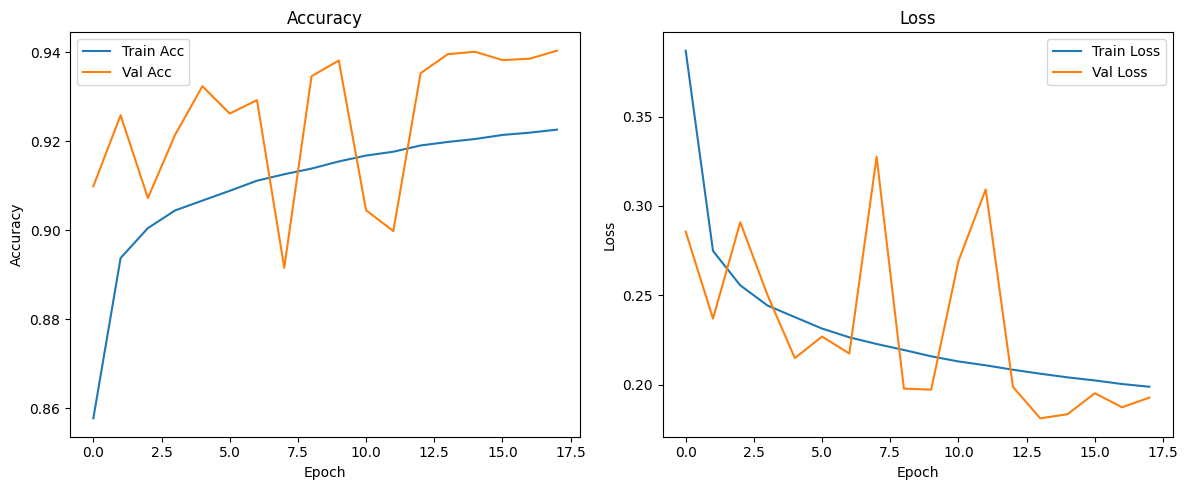

In [ ]:
import matplotlib.pyplot as plt
import timeit
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight

# Early-stopping
early_stopping = EarlyStopping(monitor='val_loss',          # Specify monitor='val_loss' to track the validation loss.
                               patience=4,                  # The number of epochs to wait for an improvement
                               restore_best_weights=True)   # Revert the model to its state where it outputted the lowest validation loss



# Train the model with early stopping
start_time = timeit.default_timer()
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)


end_time = timeit.default_timer()
print(f"Training time: {end_time - start_time:.2f} seconds")


# Plot Accuracy and Loss
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



# Evaluate 1D CNN Malware Detection Results

9208/9208 ━━━━━━━━━━━━━━━━━━━━ 5s 515us/step


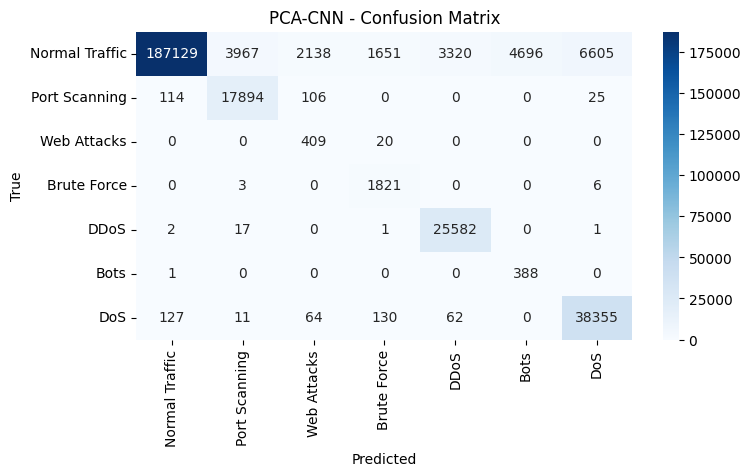

Accuracy: 0.921712569363132
Classification Report:
                precision    recall  f1-score   support

Normal Traffic       1.00      0.89      0.94    209506
 Port Scanning       0.82      0.99      0.89     18139
   Web Attacks       0.15      0.95      0.26       429
   Brute Force       0.50      1.00      0.67      1830
          DDoS       0.88      1.00      0.94     25603
          Bots       0.08      1.00      0.14       389
           DoS       0.85      0.99      0.92     38749

      accuracy                           0.92    294645
     macro avg       0.61      0.97      0.68    294645
  weighted avg       0.95      0.92      0.93    294645

Total Mal: 85139 & 85139
Total Malware Samples: 85139
Total Benign Samples: 209506

TP, TN, FP, FN for Malware vs Benign:
True Positives (Malware predicted as ANY malware): 84895 (99.71% of Malware Identified)
True Negatives (Benign predicted as Benign): 187129 (89.32% of Benign Identified)
False Positives (Benign predicted as M

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns # Import seaborn for heatmap plotting
import numpy as np # Import numpy
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Get models predictions of x_test dataset
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)# For multiclass classification, the prediction is the class with the highest probability

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
reverse_attack_type_map = {v: k for k, v in attack_type_map.items()}
labels = [reverse_attack_type_map.get(i, f'Unknown {i}') for i in range(cm.shape[0])]

# Create confusion matrix plot
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title(f"PCA-CNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Print accuracy & classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=labels))

# Calculate malware vs benign sample metrics
normal_traffic = attack_type_map.get('Normal Traffic', None)
if normal_traffic is not None:

    total_benign = np.sum(cm[normal_traffic, :])
    benign_identified_correctly = cm[normal_traffic, normal_traffic] #TN
    benign_misclassified =  total_benign - benign_identified_correctly #FP

    tn = benign_identified_correctly
    fp = benign_misclassified

    total_malware = len(X_test) - total_benign
    print(f"Total Mal: {len(X_test) - total_benign} & {np.sum(cm) - np.sum(cm[normal_traffic, :])}")

    # Count all malware samples correctly identified (diagonal elements excluding normal traffic)
    malware_identified_correctly = np.sum(np.diag(cm)) - cm[normal_traffic, normal_traffic]

    # Count all the malware samples identified even if misclassified as the wrong type of malware
    total_malware_identified = 0
    for i in range(len(labels)):
        if i != normal_traffic:  # skip the normal traffic row in the cm
            # for a row/class in the cm, count the samples from malware class that were predicted as ANY malware type (not benign)
            malware_predicted_as_any_malware = np.sum(cm[i, :]) - cm[i, 0] # Count all the samples in the row, minus the column of samples predicted as normal traffic
            total_malware_identified += malware_predicted_as_any_malware

    malware_misclassified = total_malware - total_malware_identified

    fn = malware_misclassified
    tp = total_malware_identified

    print(f"Total Malware Samples: {total_malware}")
    print(f"Total Benign Samples: {total_benign}")

    # --- Calculate and print TP, TN, FP, FN for Malware vs Benign ---
    # TP: Malware identified as ANY malware type (total_malware_identified_as_malware)
    # TN: Benign correctly predicted as Benign (cm[normal_traffic_label, normal_traffic_label])
    # FP: Benign incorrectly predicted as Malware (benign_misclassified_as_malware_count)
    # FN: Malware incorrectly predicted as Benign (Total Malware Samples - Malware Identified as Any Malware)
    print("\nTP, TN, FP, FN for Malware vs Benign:")
    print(f"True Positives (Malware predicted as ANY malware): {tp} ({(total_malware_identified/total_malware)*100:.2f}% of Malware Identified)")
    print(f"True Negatives (Benign predicted as Benign): {tn} ({(benign_identified_correctly/total_benign)*100:.2f}% of Benign Identified)")
    print(f"False Positives (Benign predicted as Malware): {fp} ({(benign_misclassified/total_benign)*100:.2f}% of Benign Misclassified)")
    print(f"False Negatives (Malware predicted as Benign): {fn} ({(malware_misclassified/total_malware)*100:.2f}% of Malware Misclassified)")

    print("\nPercentage of each Malware Class Correctly Identified:")
    for i, label in enumerate(labels):
        if i != normal_traffic: # Exclude 'Normal Traffic'
            correctly_identified = cm[i, i]
            total_in_class = np.sum(cm[i, :])
            percentage_identified = (correctly_identified / total_in_class) * 100 if total_in_class > 0 else 0
            print(f"{label}: {percentage_identified:.2f}%")

    # ---- Performance Metrics ---
    #Accuracy
    accuracy = (tp + tn)/(tp + tn + fp + fn)
    # Precision (for malware class)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    # Recall / Sensitivity (for malware class)
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    # F1-Score
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    # False Positive Rate (FPR)
    fpr = (fp / (fp + tn))*100 if (fp + tn) > 0 else 0
    # False Negative Rate (FNR)
    fnr = (fn / (fn + tp))*100 if (fn + tp) > 0 else 0

    print("\n--- Malware vs Benign Performance Metrics ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (Malware): {precision:.4f}")
    print(f"Recall / Sensitivity (Malware): {recall:.4f}")
    print(f"F1-Score (Malware): {f1_score:.4f}")
    print(f"False Positive Rate (Benign misclassified): {fpr:.2f}%")
    print(f"False Negative Rate (Malware missed): {fnr:.2f}%")

# Save best models

In [ ]:
import pickle
import os

# Create the directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# Save the trained model
model_path = os.path.join(save_path, 'Best_PCA_CNN.keras')
model.save(model_path)  # Native Keras format
print(f"Model saved as {model_path}")

# Save the trained PCA object
pca_path = os.path.join(save_path, 'BEST_PCA.pkl')
with open(pca_path, 'wb') as f:
    pickle.dump(pca, f)
print(f"PCA object saved as {pca_path}")

Model saved as /Users/siancaine/Library/Mobile Documents/com~apple~CloudDocs/Honours project/Best_PCA_CNN.keras
PCA object saved as /Users/siancaine/Library/Mobile Documents/com~apple~CloudDocs/Honours project/BEST_PCA.pkl
